In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np

In [2]:
path_to_file = tf.keras.utils.get_file('irish-lyrics-eof.txt','https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt')

73728/68970 [================================] - 0s 0us/step


In [3]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
print(text)

Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never would decay
He gave it to me to keep me reminded
Of when he stole my thyme away
Sleep, my child, and peace attend thee
All through the night
Guardian angels God will send thee
Soft the drowsy hours are creeping
Hill and dale in slumber sleeping
I my loving vigil keeping
While the moon her watch is keeping
While the weary world is sleeping
Oer thy spirit gently stealing
Visions of delight revealing
Breathes a pure and holy feeling
Though I roam a minstrel lonely
My true harp shall praise sing onl

In [4]:
print(len(text))

68953


In [5]:
tokenizer = Tokenizer()
corpus = text.lower().split('\n')    
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)

In [0]:
max_sequence_len = max([len(x) for x in input_sequences])    # 16

In [0]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))

In [9]:
print(input_sequences[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 51 12]


In [0]:
xs = input_sequences[:,:-1]   # everything except last word to be predicted
labels = input_sequences[:,-1]    # only last word 
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [0]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [13]:
history = model.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
377/377 [==============================] - 3s 8ms/step - loss: 6.8127 - accuracy: 0.0645
Epoch 2/500
377/377 [==============================] - 3s 7ms/step - loss: 6.3228 - accuracy: 0.0657
Epoch 3/500
377/377 [==============================] - 3s 7ms/step - loss: 6.2230 - accuracy: 0.0657
Epoch 4/500
377/377 [==============================] - 3s 7ms/step - loss: 6.1397 - accuracy: 0.0697
Epoch 5/500
377/377 [==============================] - 3s 8ms/step - loss: 6.0592 - accuracy: 0.0784
Epoch 6/500
377/377 [==============================] - 3s 8ms/step - loss: 5.9675 - accuracy: 0.0806
Epoch 7/500
377/377 [==============================] - 3s 8ms/step - loss: 5.8787 - accuracy: 0.0840
Epoch 8/500
377/377 [==============================] - 3s 8ms/step - loss: 5.7943 - accuracy: 0.0862
Epoch 9/500
377/377 [==============================] - 3s 7ms/step - loss: 5.7116 - accuracy: 0.0892
Epoch 10/500
377/377 [==============================] - 3s 8ms/step - loss: 5.6323 - accura

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()

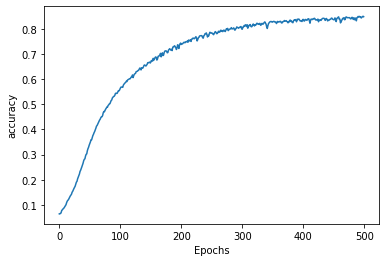

In [18]:
plot_graph(history,'accuracy')

In [23]:
seed_text = input('Enter the sentence: ')
next_words = int(input('Enter the number of words you want: '))
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Enter the sentence: hello my name is jicbas
Enter the number of words you want: 10
hello my name is jicbas and fleet and as in botany ill dim shades warrior


In [24]:
model.save('poem.m5')

INFO:tensorflow:Assets written to: poem.m5/assets
